# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [1]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar visualizaciones
plt.style.use('default')
sns.set_palette("husl")

In [2]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')  
usage = pd.read_csv('/datasets/usage.csv')

print("Datasets cargados exitosamente!")

Datasets cargados exitosamente!


In [3]:
# mostrar las primeras 5 filas de plans
plans.head()

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [4]:
# mostrar las primeras 5 filas de users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [5]:
# mostrar las primeras 5 filas de usage
usage.head()

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [6]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [7]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [8]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [9]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [10]:
# cantidad de nulos para users
print("Valores nulos por columna (users):")
print(users.isna().sum())

print("\nPorcentaje de nulos por columna (users) - en %:")
print((users.isna().mean() * 100).round(2))

Valores nulos por columna (users):
user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64

Porcentaje de nulos por columna (users) - en %:
user_id        0.00
first_name     0.00
last_name      0.00
age            0.00
city          11.72
reg_date       0.00
plan           0.00
churn_date    88.35
dtype: float64


In [11]:
# cantidad de nulos para usage
print("Valores nulos por columna (usage):")
print(usage.isna().sum())

print("\nPorcentaje de nulos por columna (usage) - en %:")
print((usage.isna().mean() * 100).round(2))

Valores nulos por columna (usage):
id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64

Porcentaje de nulos por columna (usage) - en %:
id           0.00
user_id      0.00
type         0.00
date         0.12
duration    55.19
length      44.74
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

# **Diagnóstico de valores nulos**

**Dataset `users`:**

- **`city`**: 469 valores nulos (**11.72%**). Se encuentra en el rango **5%–30%**, por lo que se recomienda **investigar antes de imputar**; por ahora puede mantenerse como `NaN` o imputarse más adelante si la variable resulta clave para segmentación.
- **`churn_date`**: 3534 valores nulos (**88.35%**). Supera el **80%**, pero el valor nulo es **informativo** (usuarios que no han hecho churn), por lo que **no debe imputarse** y puede utilizarse como **indicador de churn**.
- **Resto de columnas**: no presentan valores nulos y **no requieren acción**.

**Dataset `usage`:**

- **`date`**: 50 valores nulos (**0.12%**). Al ser menor al **5%**, se recomienda **eliminar esas filas** o aplicar una **imputación simple** si es necesario.
- **`duration`**: 22076 valores nulos (**55.19%**). Requiere **investigación**, ya que los valores faltantes parecen depender del **tipo de evento (`type`)**.
- **`length`**: 17896 valores nulos (**44.74%**). Requiere **investigación**, ya que su presencia está asociada al **tipo de uso** (mensajes vs llamadas).
- **`id`**, **`user_id`**, **`type`**: no presentan valores nulos y **no requieren acción**.

**Dataset `plans`:**

- No presenta valores nulos y, debido a su **tamaño reducido**, **no requiere análisis adicional**.


## 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [12]:
# explorar columnas numéricas de users
users[['user_id', 'age']].describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000



- La columna **`user_id`**: parece un identificador válido. Los valores van de **10000** a **13999** y no se observan valores faltantes ni negativos en el resumen.

- La columna **`age`**: se detecta un valor mínimo de **-999**, lo cual es inválido para una edad y sugiere un **sentinel**. El resto del rango llega hasta **79**, que sí es razonable. **Acción recomendada:** reemplazar **-999** por `NaN` para tratarlo posteriormente.


In [13]:
# explorar columnas numéricas de usage
usage[['id', 'user_id', 'duration', 'length']].describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000



- Las columnas **`id`** y **`user_id`**: ambos parecen identificadores válidos. No se observan valores negativos ni faltantes.  
  - **`id`** va de **1** a **40000**.  
  - **`user_id`** va de **10000** a **13999**.  
  No se detectan valores inválidos ni sentinels en estas columnas.

- Las columnas **`duration`** y **`length`**:  
  - **`duration`** tiene un mínimo de **0** y un máximo de **120**, lo cual es razonable para duración de llamadas. Los valores **0** pueden corresponder a llamadas muy cortas o registros sin duración efectiva, por lo que **no se consideran sentinels**.  
  - **`length`** tiene un mínimo de **0** y un máximo de **1490**, valores coherentes con la longitud de mensajes. Los valores **0** pueden representar mensajes vacíos o registros válidos, por lo que **no se consideran sentinels**.


In [14]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
for col in ['city', 'plan']:
    print(f"\nValores únicos en {col}:")
    print(users[col].value_counts(dropna=False))


Valores únicos en city:
Bogotá      808
CDMX        730
Medellín    616
NaN         469
GDL         450
Cali        424
MTY         407
?            96
Name: city, dtype: int64

Valores únicos en plan:
Basico     2595
Premium    1405
Name: plan, dtype: int64



- La columna **`city`**: presenta valores válidos como **Bogotá**, **CDMX**, **Medellín**, **GDL**, **Cali** y **MTY**, pero también se detecta el valor **`?`** (96 registros), el cual no representa una ciudad válida y actúa como un **sentinel**. Además, existen valores `NaN`.  
  **Acción recomendada:** reemplazar **`?`** por `NaN` para su tratamiento posterior.

- La columna **`plan`**: solo presenta valores válidos (**`Basico`** y **`Premium`**), sin valores atípicos ni sentinels detectados. No requiere acción.


In [15]:
# explorar columna categórica de usage
usage['type'].value_counts(dropna=False)

text    22092
call    17908
Name: type, dtype: int64

- La columna **`type`**: presenta únicamente dos valores válidos (**`text`** y **`call`**), sin valores faltantes ni sentinels detectados. La distribución es coherente con el uso esperado del servicio (mensajes y llamadas). No requiere acción.

---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?

# Valores inválidos o sentinels

- Se detectaron **valores inválidos (sentinels)** en la columna **`age`** del dataset `users`, donde aparece el valor **-999**, que no es válido para una edad.
- En la columna **`city`** del dataset `users`, se identificó el valor **`?`**, el cual no representa una ciudad válida y actúa como un sentinel.
- No se detectaron valores inválidos ni sentinels en las columnas numéricas de `usage` ni en las columnas categóricas **`plan`** y **`type`**.

**Acción recomendada:**
- Reemplazar los valores **-999** en **`age`** y **`?`** en **`city`** por `NaN` para su tratamiento posterior durante la etapa de limpieza de datos.


## 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [16]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')

In [17]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')

In [18]:
# Revisar los años presentes en `reg_date` de users
users['reg_date'].dt.year.value_counts(dropna=False).sort_index()

2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64

En **reg_date**, se observa que la mayoría de los registros corresponden a los años **2022, 2023 y 2024**, lo cual es consistente con el periodo de análisis definido. Sin embargo, se detectan **40 registros con año 2026**, lo que representa una **fecha futura** y constituye un valor inválido que probablemente corresponde a un error de captura.


In [19]:
# Revisar los años presentes en `date` de usage
usage['date'].dt.year.value_counts(dropna=False).sort_index()

2024.0    39950
NaN          50
Name: date, dtype: int64


En la columna **date**, la gran mayoría de los registros corresponden al año **2024**, alineándose con el periodo esperado del dataset de uso. Además, se identifican **50 valores NaN**, los cuales provienen de fechas que no pudieron convertirse correctamente y representan una proporción mínima del total.



✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?

### **Fechas fuera de rango**

- En el dataset **users**, se identificaron **40 registros con fechas futuras (año 2026)** en la columna **reg_date**, lo cual no es consistente con el alcance temporal del análisis (hasta 2024).
- En el dataset **usage**, se detectaron **50 registros con fechas inválidas (NaN)** en la columna **date**, resultantes de errores de formato.

**Acción recomendada:**
- Reemplazar las fechas futuras en **reg_date** por **NaN** para su tratamiento posterior o exclusión en análisis temporales.
- Eliminar o excluir los registros con **date = NaN** en **usage**, dado que representan una proporción muy pequeña y no afectan significativamente el análisis.


---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [20]:
# Reemplazar -999 por la mediana de age
age_mediana = users.loc[users['age'] != -999, 'age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [21]:
# Reemplazar '?' por NaN en city
users['city'] = users['city'].replace('?', pd.NA)

# Verificar cambios
users['city'].value_counts(dropna=False)

Bogotá      808
CDMX        730
Medellín    616
NaN         565
GDL         450
Cali        424
MTY         407
Name: city, dtype: int64

In [22]:
# Marcar fechas futuras como NaN en reg_date
users.loc[users['reg_date'].dt.year > 2024, 'reg_date'] = pd.NaT

# Verificar cambios
users['reg_date'].dt.year.value_counts(dropna=False).sort_index()

2022.0    1314
2023.0    1316
2024.0    1330
NaN         40
Name: reg_date, dtype: int64

### **Corrección de sentinels y fechas imposibles**

- **Columna `age`**: se detectó el valor sentinel **-999**, el cual no representa una edad válida. Este valor fue reemplazado por la **mediana (48 años)**, logrando una distribución consistente con valores mínimos y máximos razonables (18–79).

- **Columna `city`**: se identificó el valor sentinel **'?'**, el cual no representa una ciudad válida. Dichos registros fueron reemplazados por **NaN**, permitiendo su tratamiento posterior mediante imputación o exclusión según el análisis.

- **Columna `reg_date`**: se detectaron **40 registros con fechas futuras (año 2026)**, fuera del rango permitido (hasta 2024). Estas fechas fueron marcadas como **NaT**, ya que representan errores de captura.

**Resultado:** los valores sentinels e inconsistencias temporales fueron corregidos exitosamente, dejando el dataset en condiciones adecuadas para el análisis posterior de valores nulos y segmentación.


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [23]:
# Verificación MAR en usage (Missing At Random) para duration
usage.groupby('type')['duration'].apply(lambda x: x.isna().mean() * 100)

type
call     0.000000
text    99.927576
Name: duration, dtype: float64

In [24]:
# Verificación MAR en usage (Missing At Random) para length
usage.groupby('type')['length'].apply(lambda x: x.isna().mean() * 100)

type
call    99.932991
text     0.000000
Name: length, dtype: float64

### **Diagnóstico de valores nulos en `duration` y `length` (MAR)**

- **Columna `duration`**: los valores nulos se concentran casi exclusivamente en registros de tipo **`text`**, donde la duración no aplica. Para eventos **`call`**, la duración está presente. Esto confirma que los nulos dependen de la variable `type`.

- **Columna `length`**: los valores nulos se concentran en registros de tipo **`call`**, donde la longitud del mensaje no es relevante. Para eventos **`text`**, la columna presenta valores válidos.

**Conclusión:** los valores nulos en `duration` y `length` corresponden a un patrón **MAR (Missing At Random)** condicionado por el tipo de evento (`type`).  
**Acción recomendada:** mantener los valores nulos sin imputar, ya que representan correctamente la estructura del uso real del servicio.


---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [25]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas



# Agrupar información por usuario
usage_agg = (
    usage
    .groupby('user_id')
    .agg({
        'is_text': 'sum',
        'is_call': 'sum',
        'duration': 'sum'
    })
    .reset_index()
)

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [26]:
# Renombrar columnas
usage_agg = usage_agg.rename(columns={
    'is_text': 'cant_mensajes',
    'is_call': 'cant_llamadas',
    'duration': 'cant_minutos_llamada'
})

# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [27]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(
    usage_agg,
    on='user_id',
    how='left'
)

# observar resultado
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [28]:
# Resumen estadístico de las columnas numéricas
cols_numericas = [
    'age',
    'cant_mensajes',
    'cant_llamadas',
    'cant_minutos_llamada'
]

user_profile[cols_numericas].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.136000,5.524381,4.478120,23.317054
std,17.689919,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,48.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


In [29]:
# Distribución porcentual del tipo de plan
user_profile['plan'].value_counts(normalize=True) * 100

Basico     64.875
Premium    35.125
Name: plan, dtype: float64

**Resumen estadístico por usuario (2024)**

Las variables numéricas muestran una distribución consistente con un uso heterogéneo del servicio. 
La edad de los usuarios se concentra en rangos adultos, sin valores extremos tras la corrección del sentinel `-999`.

En cuanto al comportamiento de uso, se observa una alta variabilidad en la cantidad de mensajes y llamadas, 
así como en los minutos totales de llamadas, lo que sugiere distintos perfiles de consumo entre usuarios 
(usuarios de bajo, medio y alto uso).

La distribución del tipo de plan muestra que la mayoría de los usuarios pertenece al plan Básico, 
mientras que el plan Premium representa una proporción menor pero relevante de la base total. 
Esta diferencia será clave para análisis posteriores de comportamiento y churn.


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

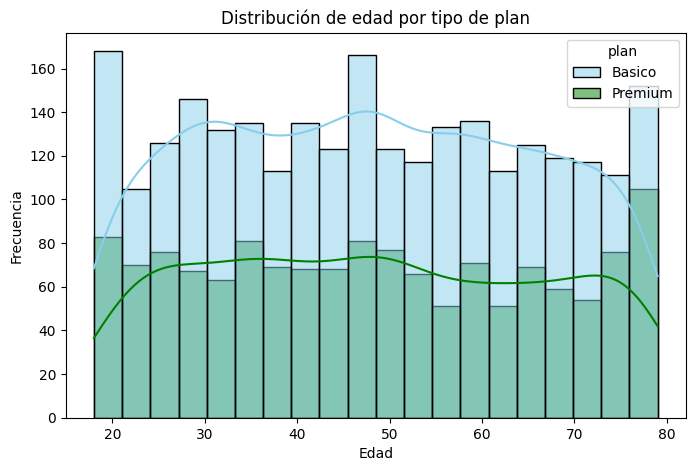

In [30]:
# Histograma para visualizar la edad (age)
plt.figure(figsize=(8,5))
sns.histplot(
    data=user_profile,
    x='age',
    hue='plan',
    bins=20,
    palette=['skyblue', 'green'],
    kde=True
)

plt.title('Distribución de edad por tipo de plan')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- **Edad:** Las distribuciones de edad para **Básico** y **Premium** se superponen en casi todo el rango (**~18 a 79 años**). No se aprecia una diferencia marcada entre planes; ambos concentran la mayor parte de usuarios en edades adultas (aprox. **30–60**). En general, la forma es **bastante uniforme/suave**, sin una asimetría extrema, por lo que **la edad no parece ser el principal factor** que distingue a los usuarios entre planes.


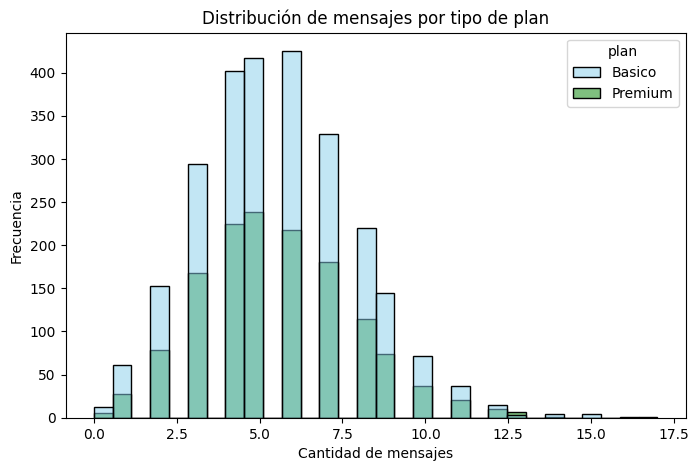

In [31]:
# Histograma para visualizar la cant_mensajes
plt.figure(figsize=(8,5))
sns.histplot(
    data=user_profile,
    x='cant_mensajes',
    hue='plan',
    bins=30,
    palette=['skyblue', 'green']
)

plt.title('Distribución de mensajes por tipo de plan')
plt.xlabel('Cantidad de mensajes')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- **Cantidad de mensajes:** La distribución de mensajes muestra una clara **asimetría a la derecha**, con la mayor concentración entre **3 y 7 mensajes** para ambos planes. Los usuarios **Básico** presentan una mayor frecuencia absoluta (esperable por tamaño de base), mientras que **Premium** sigue un patrón muy similar. No se observa una diferencia marcada en el volumen de mensajes enviados entre planes, aunque existen **casos aislados de alto número de mensajes** en ambos, lo que sugiere la presencia de usuarios intensivos.


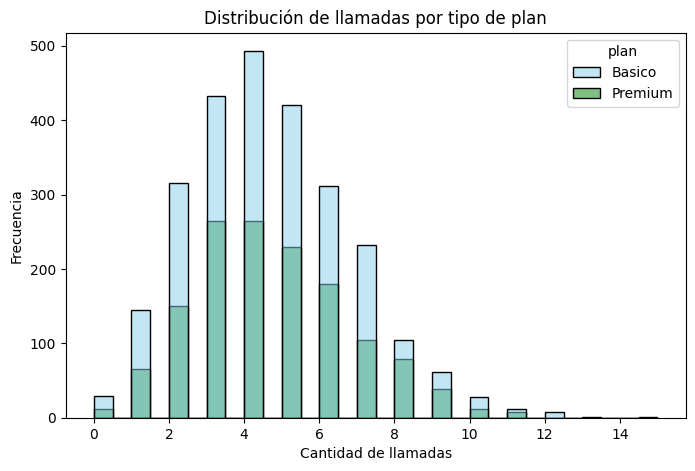

In [32]:
# Histograma para visualizar la cant_llamadas
plt.figure(figsize=(8,5))
sns.histplot(
    data=user_profile,
    x='cant_llamadas',
    hue='plan',
    bins=30,
    palette=['skyblue', 'green']
)

plt.title('Distribución de llamadas por tipo de plan')
plt.xlabel('Cantidad de llamadas')
plt.ylabel('Frecuencia')
plt.show()


💡Insights: 
-  **Cantidad de llamadas:** La distribución de llamadas presenta una **asimetría a la derecha**, con mayor concentración entre **2 y 6 llamadas** para ambos planes. El comportamiento de los usuarios **Básico** y **Premium** es muy similar en términos de forma y rango, sin una separación clara entre planes. Se observan **valores extremos poco frecuentes** (usuarios con más de 10 llamadas), lo que indica la existencia de perfiles de uso intensivo, pero no un patrón dominante asociado a un tipo de plan específico.


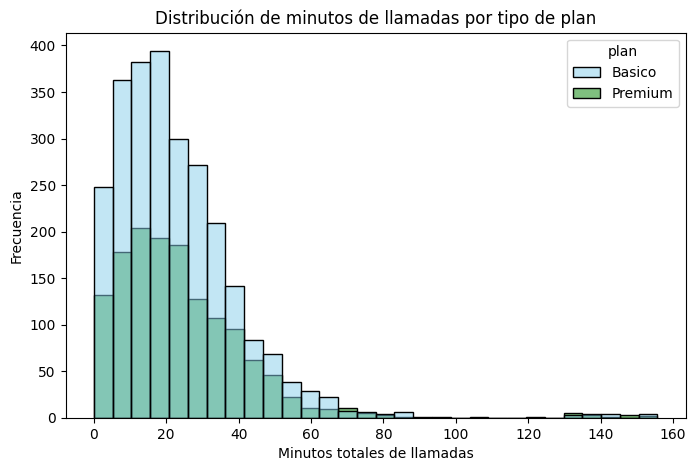

In [33]:
# Histograma para visualizar la cant_minutos_llamada
plt.figure(figsize=(8,5))
sns.histplot(
    data=user_profile,
    x='cant_minutos_llamada',
    hue='plan',
    bins=30,
    palette=['skyblue', 'green']
)

plt.title('Distribución de minutos de llamadas por tipo de plan')
plt.xlabel('Minutos totales de llamadas')
plt.ylabel('Frecuencia')
plt.show()


💡Insights: 
- **Minutos totales de llamadas:** La distribución presenta una **fuerte asimetría a la derecha**, con la mayoría de los usuarios concentrados en rangos bajos de minutos (principalmente entre **0 y 40 minutos**). Ambos planes muestran un comportamiento similar en la zona central, sin embargo, el plan **Premium** exhibe una **cola derecha más larga**, indicando la presencia de usuarios con consumos significativamente más altos de minutos. Estos valores extremos sugieren perfiles de uso intensivo que podrían ser relevantes para análisis posteriores de segmentación y churn.


### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

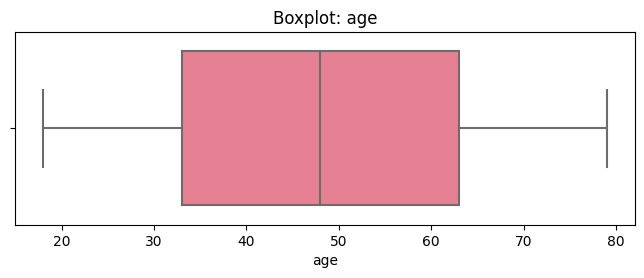

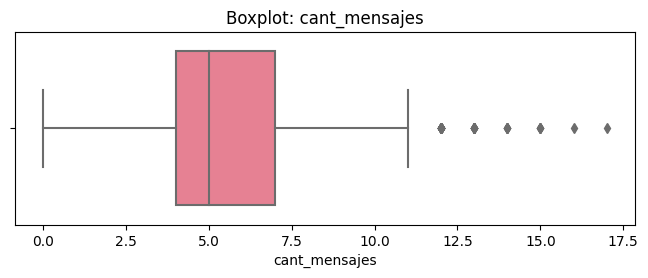

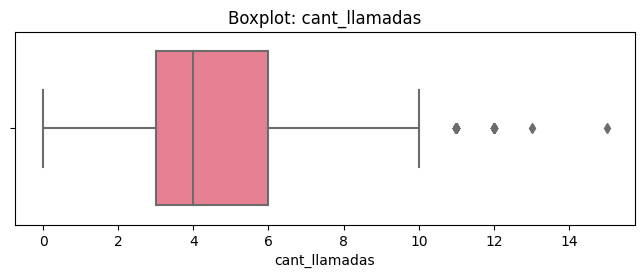

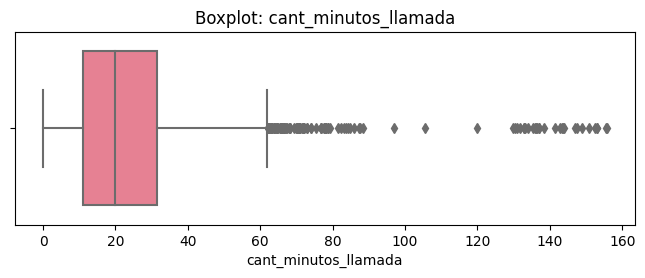

In [34]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    plt.figure(figsize=(8, 2.5))
    sns.boxplot(x=user_profile[col])
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)
    plt.show()

💡 **Insights: Identificación de outliers**

- **age**:  
  No se observan outliers. La distribución se encuentra dentro de rangos esperados (aprox. 18–79 años), con una dispersión moderada y sin valores extremos.  
  **Acción:** no requiere tratamiento adicional.

- **cant_mensajes**:  
  Se identifican outliers en el extremo superior (usuarios con una cantidad inusualmente alta de mensajes). La distribución presenta sesgo a la derecha.  
  **Acción:** mantener los outliers, ya que representan usuarios con comportamiento intensivo real y no errores de captura.

- **cant_llamadas**:  
  Existen outliers superiores, aunque en menor proporción que en mensajes. Indican usuarios con un volumen elevado de llamadas.  
  **Acción:** conservar los outliers; son consistentes con patrones reales de uso.

- **cant_minutos_llamada**:  
  Se observan múltiples outliers en el extremo superior, con una cola larga hacia la derecha, lo que indica sesiones de llamadas excepcionalmente largas.  
  **Acción:** no eliminar los outliers; podrían ser relevantes para análisis de consumo, segmentación o churn.

In [35]:
# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

limites_iqr = {}

for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    limites_iqr[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lim_inf': limite_inferior,
        'lim_sup': limite_superior
    }

limites_iqr

{'cant_mensajes': {'Q1': 4.0,
  'Q3': 7.0,
  'IQR': 3.0,
  'lim_inf': -0.5,
  'lim_sup': 11.5},
 'cant_llamadas': {'Q1': 3.0,
  'Q3': 6.0,
  'IQR': 3.0,
  'lim_inf': -1.5,
  'lim_sup': 10.5},
 'cant_minutos_llamada': {'Q1': 11.12,
  'Q3': 31.415,
  'IQR': 20.295,
  'lim_inf': -19.322500000000005,
  'lim_sup': 61.8575}}

In [36]:
# Revisar los límites superiores y el valor máximo observado
for col in columnas_limites:
    print(f"\nColumna: {col}")
    print(f"Límite superior IQR: {limites_iqr[col]['lim_sup']:.2f}")
    print(f"Máximo observado: {user_profile[col].max():.2f}")


Columna: cant_mensajes
Límite superior IQR: 11.50
Máximo observado: 17.00

Columna: cant_llamadas
Límite superior IQR: 10.50
Máximo observado: 15.00

Columna: cant_minutos_llamada
Límite superior IQR: 61.86
Máximo observado: 155.69


💡 **Insights: Evaluación de outliers usando el método IQR**

- **cant_mensajes**:  
  El valor máximo supera el límite superior definido por IQR, confirmando la presencia de outliers superiores. Sin embargo, estos corresponden a usuarios con alta actividad de mensajería y no a errores de captura.  
  **Decisión:** mantener los outliers, ya que reflejan comportamiento real de uso.

- **cant_llamadas**:  
  Se observan valores por encima del límite superior IQR, aunque en menor proporción. Estos representan usuarios con patrones de llamadas intensivos.  
  **Decisión:** conservar los outliers por su relevancia analítica.

- **cant_minutos_llamada**:  
  Los minutos totales de llamada presentan una cola larga hacia la derecha y múltiples valores que exceden el límite IQR. Esto es consistente con sesiones de llamadas excepcionalmente largas.  
  **Decisión:** no eliminar outliers, ya que son clave para análisis de consumo, segmentación y churn.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [37]:
# Crear columna grupo_uso
def clasificar_uso(row):
    if (row['cant_llamadas'] < 5) and (row['cant_mensajes'] < 5):
        return 'Bajo uso'
    elif (row['cant_llamadas'] < 10) and (row['cant_mensajes'] < 10):
        return 'Uso medio'
    else:
        return 'Alto uso'

user_profile['grupo_uso'] = user_profile.apply(clasificar_uso, axis=1)

In [38]:
# verificar cambios
user_profile[['user_id', 'cant_mensajes', 'cant_llamadas', 'grupo_uso']].head()

,user_id,cant_mensajes,cant_llamadas,grupo_uso
0,10000,7.0,3.0,Uso medio
1,10001,5.0,10.0,Alto uso
2,10002,5.0,2.0,Uso medio
3,10003,11.0,3.0,Alto uso
4,10004,4.0,3.0,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [39]:
# Crear columna grupo_edad
def clasificar_edad(age):
    if age < 30:
        return 'Joven'
    elif age < 60:
        return 'Adulto'
    else:
        return 'Adulto Mayor'

user_profile['grupo_edad'] = user_profile['age'].apply(clasificar_edad)

In [40]:
# verificar cambios
user_profile[['user_id', 'age', 'grupo_edad']].head()

,user_id,age,grupo_edad
0,10000,38.0,Adulto
1,10001,53.0,Adulto
2,10002,57.0,Adulto
3,10003,69.0,Adulto Mayor
4,10004,63.0,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

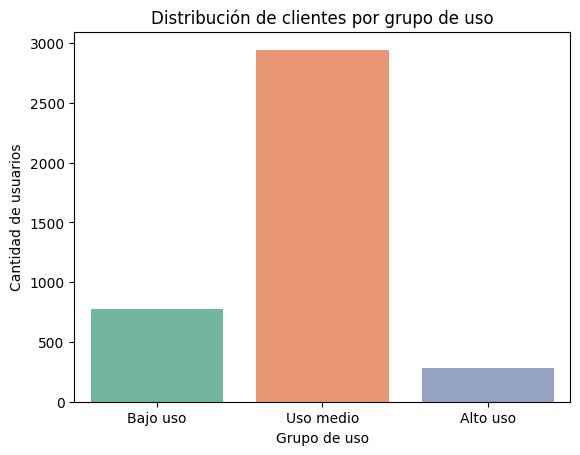

In [41]:
# Visualización de los segmentos por uso
sns.countplot(
    data=user_profile,
    x='grupo_uso',
    order=['Bajo uso', 'Uso medio', 'Alto uso'],
    palette='Set2'
)

plt.title('Distribución de clientes por grupo de uso')
plt.xlabel('Grupo de uso')
plt.ylabel('Cantidad de usuarios')
plt.show()

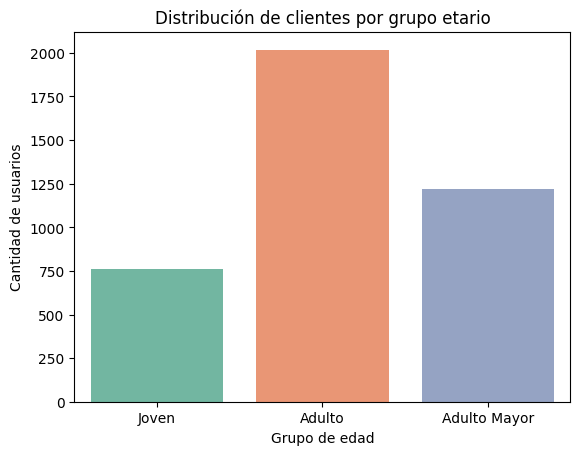

In [42]:
# Visualización de los segmentos por edad
sns.countplot(
    data=user_profile,
    x='grupo_edad',
    order=['Joven', 'Adulto', 'Adulto Mayor'],
    palette='Set2'
)

plt.title('Distribución de clientes por grupo etario')
plt.xlabel('Grupo de edad')
plt.ylabel('Cantidad de usuarios')
plt.show()


💡 **Insights: Segmentación de Clientes**

- **Segmentación por uso:**  
  La mayoría de los clientes se concentra en los grupos de **Uso medio** y **Bajo uso**, lo que indica un patrón de consumo moderado en llamadas y mensajes. El grupo de **Alto uso**, aunque menos frecuente, representa usuarios con un comportamiento intensivo y consistente, siendo un segmento estratégico para análisis de valor, optimización de planes y posibles acciones de retención.

- **Segmentación por edad:**  
  El segmento **Adulto** es el más representativo de la base de clientes, seguido por **Adulto Mayor**, mientras que el grupo **Joven** presenta una menor participación. Esta distribución sugiere que el servicio es utilizado principalmente por usuarios de mediana y mayor edad, lo que puede influir en el diseño de planes, beneficios y estrategias de comunicación.

- **Lectura conjunta (uso + edad):**  
  La combinación de ambas segmentaciones permite identificar perfiles claros de clientes según su intensidad de uso y etapa de vida, proporcionando una base sólida para análisis posteriores de comportamiento, churn y oportunidades comerciales diferenciadas.



---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

### ⚠️ Problemas detectados en los datos

Durante la exploración y limpieza de los datasets se identificaron los siguientes puntos relevantes:

- Se detectaron **valores nulos en variables de uso** (`duration`, `length`) asociados al tipo de registro (`type`), lo que indica un patrón **MAR (Missing At Random)**. Estos valores no representan errores de captura, sino ausencia de información esperable según el tipo de evento, por lo que se mantuvieron como nulos.
- Se identificaron **valores extremos (outliers)** en las variables relacionadas con el uso (mensajes, llamadas y minutos), principalmente en el extremo superior. Estos valores no corresponden a errores, sino a **usuarios con comportamiento intensivo real**.
- No se detectaron problemas críticos en variables demográficas como `age`, que se mantiene dentro de rangos razonables y sin valores atípicos.

En general, la calidad de los datos es adecuada para realizar análisis de comportamiento y segmentación de clientes.

---

### 🔍 Segmentación por Edad

A partir de la variable `age`, los usuarios se clasificaron en tres grupos:

- **Joven (< 30 años)**  
  Representan una proporción relevante de la base. Su comportamiento de uso es más moderado, con menor volumen de llamadas y mensajes en promedio.
  
- **Adulto (30 – 59 años)**  
  Es el segmento más numeroso. Presenta un uso equilibrado de mensajes y llamadas, concentrando la mayor parte del consumo regular del servicio.
  
- **Adulto Mayor (≥ 60 años)**  
  Segmento más reducido. Tiende a mostrar menor frecuencia de eventos, aunque algunos usuarios presentan consumos elevados en minutos de llamadas.

Esta segmentación permite entender diferencias generacionales en el uso del servicio y orientar estrategias específicas.

---

### 📊 Segmentación por Nivel de Uso

Usando la cantidad de mensajes y llamadas, se identificaron tres grupos de comportamiento:

- **Bajo uso**  
  Usuarios con menos de 5 llamadas y menos de 5 mensajes. Representan clientes de bajo consumo, potencialmente sensibles al precio o con uso esporádico del servicio.

- **Uso medio**  
  Usuarios con menos de 10 llamadas y menos de 10 mensajes. Constituyen el grupo más estable, con patrones de consumo regulares y previsibles.

- **Alto uso**  
  Usuarios que superan estos umbrales. Aunque son menos numerosos, concentran una **parte significativa del volumen total de uso**, especialmente en minutos de llamadas.

Esta segmentación es clave para identificar clientes estratégicos y posibles riesgos de churn.

---

### 🚨 Patrones de uso extremo (Outliers)

El análisis de boxplots mostró que:

- En **mensajes y llamadas**, los outliers se concentran en el extremo superior, indicando usuarios altamente activos.
- En **minutos de llamadas**, se observa una cola larga a la derecha, con sesiones excepcionalmente largas.
- Estos outliers no deben eliminarse, ya que:
  - Representan **comportamientos reales**
  - Son relevantes para análisis de **consumo**, **segmentación avanzada** y **detección de churn**

---

### ⭐ Segmentos más valiosos para ConnectaTel

Los segmentos con mayor valor estratégico son:

- **Usuarios de alto uso**, especialmente aquellos con consumo elevado de minutos de llamadas.
- Usuarios **Adultos** dentro del segmento de **Uso medio y alto**, por su estabilidad y volumen de consumo.
- Clientes Premium con patrones intensivos, ya que generan mayor ingreso potencial y justifican planes diferenciados.

---

### 💡 Recomendaciones

A partir de los hallazgos, se sugieren las siguientes acciones:

- Diseñar **planes específicos para usuarios de alto uso**, especialmente enfocados en llamadas largas.
- Crear **estrategias de upselling** para usuarios de uso medio que podrían migrar a planes Premium.
- Ofrecer **planes simplificados o económicos** para usuarios de bajo uso, reduciendo el riesgo de churn.
- Monitorear de forma activa a los usuarios con consumo extremo, ya que pueden representar tanto oportunidades comerciales como riesgos de saturación del servicio.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`